In [15]:
using Pkg
Pkg.activate(".")

# Pkg.add("GraphPlot")

Activating environment at `~/hypergraph-clustering/jl/Project.toml`


    Status `~/hypergraph-clustering/jl/Project.toml`
  [8f4d0f93] Conda v1.4.1
  [864edb3b] DataStructures v0.17.17
  [b4f34e82] Distances v0.9.0
  [8f5d6c58] EzXML v1.0.0
  [5789e2e9] FileIO v1.3.0
  [a2cc645c] GraphPlot v0.3.1
  [033835bb] JLD2 v0.1.13
  [093fc24a] LightGraphs v1.3.3
  [9c8b4983] LightXML v0.8.1
  [91a5bcdd] Plots v1.3.7
  [49802e3a] ProgressBars v0.7.1
  [92933f4c] ProgressMeter v1.3.0
  [438e738f] PyCall v1.91.4
  [d330b81b] PyPlot v2.9.0
  [3646fa90] ScikitLearn v0.6.2
  [aa4a32ff] SimpleHypergraphs v0.1.12 #master (https://github.com/pszufe/SimpleHypergraphs.jl)
  [2913bbd2] StatsBase v0.33.0


In [2]:
using Pkg, SimpleHypergraphs, Random, ProgressBars, Plots, ProgressMeter, JLD2, FileIO, PyPlot, ScikitLearn, GraphPlot
@sk_import metrics : f1_score 
@sk_import metrics : accuracy_score
include("HypergraphClustering.jl")
rg = txt2h("./rg.txt")

h2correlation (generic function with 1 method)

In [131]:
h1 = Hypergraph{Float64, Int, String}(6,9)
h1[1:3,1] .= 1
h1[1:2,2] .= 1
h1[2:3,3] .= 1
h1[1, 4] = 1
h1[3, 4] = 1
h1[3:4, 5] .= 1
h1[4:6,6] .= 1
h1[4:5,7] .= 1
h1[5:6, 8] .= 1
h1[4, 9] = 1
h1[6, 9] = 1
h1[3, 5:9] .= 1
# SimpleHypergraphs.draw(h1, GraphBased, width=500, with_node_labels=true, with_he_labels=true, radius=20, stroke_width=10)
# SimpleHypergraphs.draw(h1, GraphBased)
dr


UndefVarError: UndefVarError: draw not defined

In [7]:
w = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end


w = [i.weight for i in sort(w, lt=comp)]
w = round.(w, digits=2)

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [28]:
b = BipartiteView(rg)
bv = LightGraphs.SimpleGraph(b)

c = vcat(["orange" for i in 1:nhv(rg)], ["lightseagreen" for i in 1:nhe(rg)])
labels = vcat(string.("v", string.(1:nhv(rg))), string.("he", string.(1:nhe(rg))))

# gplot(bv, nodelabel=labels, nodefillc=c, edgelabel=w)

550-element Array{String,1}:
 "v1"  
 "v2"  
 "v3"  
 "v4"  
 "v5"  
 "v6"  
 "v7"  
 "v8"  
 "v9"  
 "v10" 
 "v11" 
 "v12" 
 "v13" 
 ⋮     
 "he39"
 "he40"
 "he41"
 "he42"
 "he43"
 "he44"
 "he45"
 "he46"
 "he47"
 "he48"
 "he49"
 "he50"

0.5

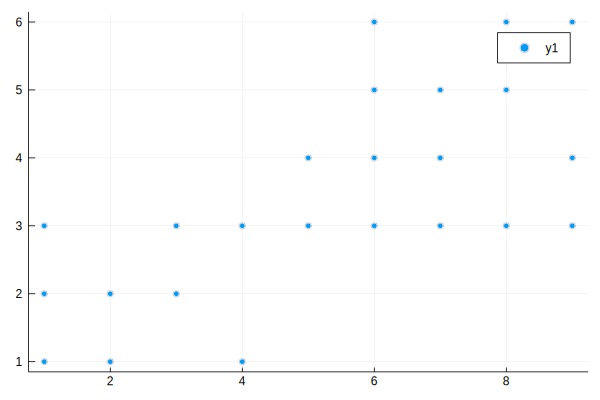

In [100]:
vi = visu(h1)
Plots.scatter(vi)

In [6]:
include("./ClusteringUtil.jl")
bg = build_bg(rg, tfidf)
function comp(x, y)
    if(x.from == y.from) return x.to < y.to end
    return x.from < y.from
end

w = [round(i.weight,digits=2) for i in sort(bg, lt=comp)]

2759-element Array{Float64,1}:
 0.06
 0.06
 0.07
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 0.06
 ⋮   
 0.07
 0.06
 0.06
 0.07
 0.06
 0.07
 0.08
 0.07
 0.07
 0.06
 0.09
 0.06

In [189]:
# @time const trim_cookpad = build_trimcookpad("../ingredients_trim15.blbl")

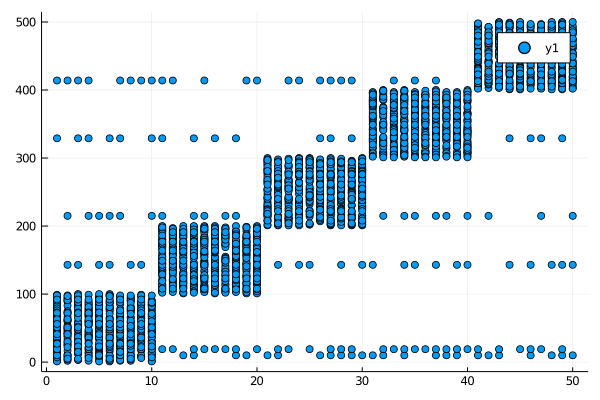

In [44]:
include("./CreateHypergraph.jl")
include("./ClusteringUtil.jl")
# 1clusterのnode number
a = [100 for i in 1:5]
# 1clusterのhe number
b = [10 for i in 1:5]

rg, noise, tr_data = create_hypergraph(a, b, 0.5, 0.02)
vi = visu(rg)
Plots.scatter(vi)
# h2txt(rg, "test")

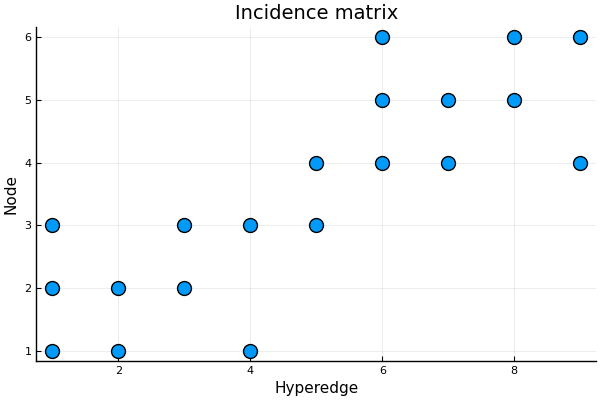

In [90]:
vi2 = visu(h1)
Plots.scatter(vi2, xlabel="Hyperedge", ylabel="Node", title="Incidence matrix", label="", markersize=10)

In [129]:
include("./ClusteringUtil.jl")
noise_node = [true in i for i in noise]
edges = build_bg(rg, tfidf)
order = noise_order(edges, noise)
tmp = [noise_node[i.from] ? 1 : 0 for i in edges]
[i[1] for i in enumerate(noise_node)][noise_node .== 1]
# Plots.plot(tmp)
# Plots.plot(order, xlabel="#noise node", ylabel="#order")

6-element Array{Int64,1}:
  10
  19
 143
 215
 329
 414

In [1]:
include("./ClusteringUtil.jl")
p_arr = []
for i in 0:0.5:1
    push!(p_arr, plot_incidence(rg, "okapi", okapi))
end

Plots.plot(p_arr...)

┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/SimpleHypergraphs/rB8ho.ji for SimpleHypergraphs [aa4a32ff-dd5d-5357-90e3-e7a9512f0501]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/C0117035/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240


UndefVarError: UndefVarError: rg not defined

In [10]:
plot_incidence(rg, "weighted", general_weight)

1-element Array{Any,1}:
 Plot{Plots.GRBackend() n=16}

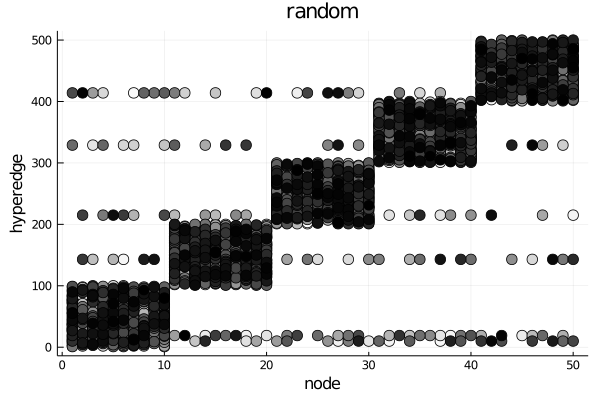

In [238]:
plot_incidence(rg, "random", random_weight)

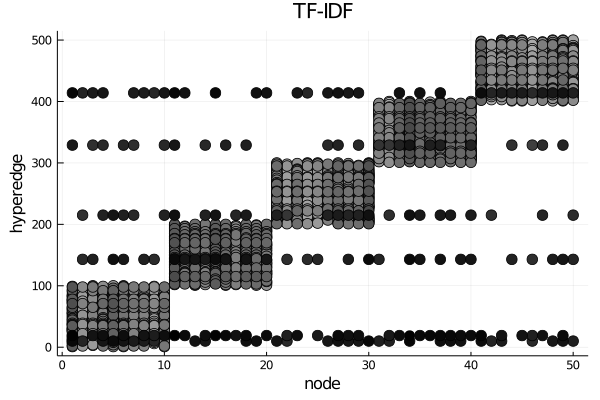

In [38]:
include("./ClusteringUtil.jl")
tr_data = Set.([1:100, 101:200, 201:300, 301:400, 401:500])
plot_incidence(rg, "TF-IDF")

In [81]:
include("./HypergraphClustering.jl")
include("./ClusteringUtil.jl")
@time uf,ms, part, part_hist = clustering3(rg, 1, modularity, okapi)

computing...100%|███████████████████████████████████████| Time: 0:00:02


  2.713673 seconds (12.18 M allocations: 555.949 MiB, 33.88% gc time)


(UnionFind{Int64}([461, 461, 461, 461, 461, 461, 461, 461, 461, 461  …  461, 461, 461, 461, 461, 461, 461, 461, 461, 461]), Any[-2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84, -2.142468242520785e-84  …  -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, -0.2055565414593314, 0.0], Set{Int64}[Set([288, 306, 29, 300, 289, 74, 435, 176, 57, 285  …  341, 186, 321, 420, 6, 423, 271, 23, 315, 322, 218])], Any[Set{Int64}[Set([288]), Set([306]), Set([11]), Set([491]), Set([134]), Set([158]), Set([160]), Set([215]), Set([464]), Set([29])  …  Set([23]), Set([498]), Set([305]), Set([315]), Set([322]), Set([349]), Set([27]), Set([496]), Set([218]), Set([56])], Set{Int64}[Set([433, 407]), Set([288]), Set([306]), Set([11

142.021026 seconds (674.78 M allocations: 81.715 GiB, 12.11% gc time)


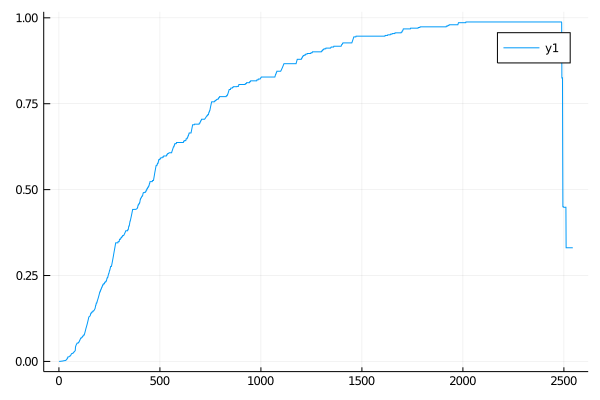

In [62]:
scores = []
@time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))

Plots.plot(scores)

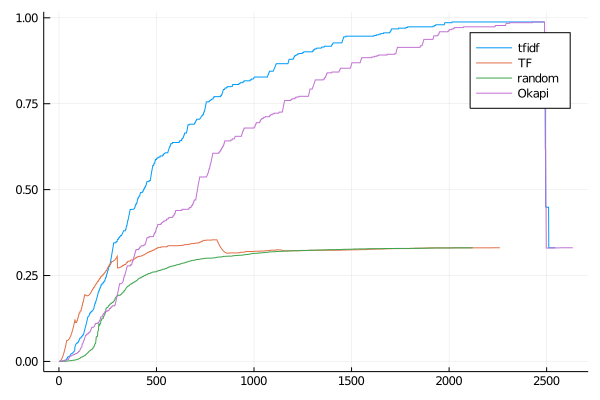

In [83]:
# @time push!(scores,scoring.(part_hist, Ref(tr_data), Ref(f1_score)))
Plots.plot(scores, label=["TFIDF" "TF" "random" "Okapi"])

In [80]:
random_weight(rg)

0.7998647393435177

In [34]:
include("ClusteringUtil.jl")
part = clustering4(rg, 10, modularity, tfidf)

10-element Array{Set{Int64},1}:
 Set([329, 491, 464, 478, 499, 477, 435, 494, 448, 490  …  415, 420, 454, 423, 424, 427, 446, 485, 498, 405, 496])
 Set([306, 370, 365, 391, 400, 342, 384, 375, 318, 372  …  321, 378, 389, 312, 317, 358, 305, 315, 322, 349, 301])
 Set([197, 134, 158, 136, 160, 151, 131, 144, 142, 173  …  161, 186, 119, 191, 156, 177, 116, 123, 163, 108, 164])
 Set([288, 241, 249, 207, 300, 289, 201, 283, 285, 252  …  273, 291, 268, 281, 243, 222, 277, 271, 255, 218, 276])
 Set([2, 89, 11, 29, 74, 57, 31, 78, 70, 33  …  81, 98, 51, 22, 6, 24, 73, 53, 23, 27, 56])                       
 Set([215])                                                                                                       
 Set([10])                                                                                                        
 Set([143])                                                                                                       
 Set([19])                                      

500×50 Hypergraph{Int64,Nothing,Nothing,Dict{Int64,Int64}}:
 1          nothing   nothing   nothing  …   nothing   nothing   nothing
 1         1          nothing  1             nothing   nothing   nothing
  nothing   nothing  1          nothing      nothing   nothing   nothing
 1         1         1          nothing      nothing   nothing   nothing
  nothing  1         1          nothing      nothing   nothing   nothing
  nothing   nothing   nothing  1         …   nothing   nothing   nothing
 1         1          nothing   nothing      nothing   nothing   nothing
 1          nothing   nothing  1             nothing   nothing   nothing
  nothing  1          nothing   nothing      nothing   nothing   nothing
 1         1          nothing  1            1         1         1       
 1         1          nothing   nothing  …   nothing   nothing   nothing
 1          nothing  1          nothing      nothing   nothing   nothing
  nothing   nothing  1         1             nothing   nothing  

5-element Array{Set{Int64},1}:
 Set([2, 89, 11, 29, 74, 57, 31, 78, 70, 33  …  98, 19, 51, 22, 6, 24, 73, 53, 23, 27, 56])                       
 Set([197, 134, 158, 136, 160, 151, 131, 144, 142, 173  …  161, 186, 119, 191, 156, 177, 116, 123, 163, 108, 164])
 Set([288, 241, 215, 249, 207, 300, 289, 201, 283, 285  …  273, 291, 268, 281, 243, 222, 277, 271, 255, 218, 276])
 Set([329, 306, 370, 365, 391, 400, 342, 384, 375, 318  …  321, 378, 389, 312, 317, 358, 305, 315, 322, 349, 301])
 Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407  …  415, 420, 454, 423, 424, 427, 446, 485, 498, 405, 496])

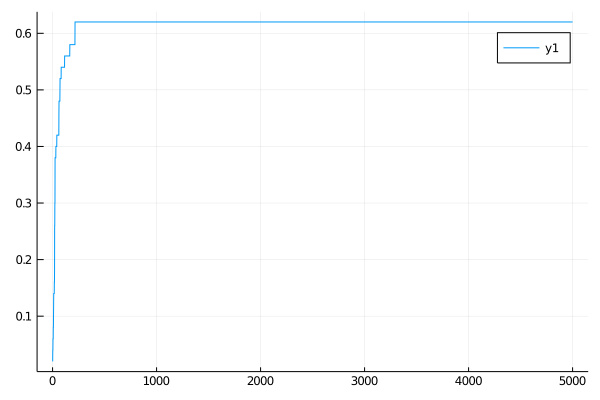

In [81]:
cfm = CFModularityCNMLike(5000)
bm, bp, hist = findcommunities(rg, cfm)

Plots.plot(hist)

In [41]:
scoring(part, tr_data, f1_score)
scoring(part, tr_data, accuracy_score)

0.9944529058116233

In [43]:
include("./HypergraphClustering.jl")
# act_sc = part2is_samecluster(tr_data)
# pred_sc = part2is_samecluster(part)
# jl_sc = part2is_samecluster(bp)
# jl_fscore = f1_score(act_sc, jl_sc)
# jl_acc = accuracy_score(act_sc, jl_sc)
# fscore = f1_score(act_sc, pred_sc)
# acc = accuracy_score(act_sc, pred_sc)



@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
using StatsBase
# スピアマン ケンドール
StatsBase.corspearman(arr1, arr2), StatsBase.corkendall(arr1, arr2)

  0.536300 seconds (963.25 k allocations: 54.130 MiB, 4.78% gc time)


(0.6503325997278955, 0.49466836458129115)

In [226]:
include("./ClusteringUtil.jl")
build_bg(rg, tfidf)

2610-element Array{edge,1}:
 edge(381, 537, 0.01818480958994914)  
 edge(320, 537, 0.01818480958994914)  
 edge(311, 537, 0.01818480958994914)  
 edge(363, 535, 0.017797184802275892) 
 edge(333, 534, 0.0174805089161144)   
 edge(279, 528, 0.017174905613385128) 
 edge(443, 541, 0.01714990172710651)  
 edge(412, 541, 0.01714990172710651)  
 edge(392, 533, 0.016996619395945142) 
 edge(381, 538, 0.01647998369089141)  
 edge(314, 538, 0.01647998369089141)  
 edge(377, 537, 0.016437115158448434) 
 edge(353, 537, 0.016437115158448434) 
 ⋮                                    
 edge(60, 544, 0.0069646102313549235) 
 edge(26, 506, 0.006925971715233542)  
 edge(47, 510, 0.006885060454971241)  
 edge(23, 510, 0.006885060454971241)  
 edge(11, 510, 0.006885060454971241)  
 edge(26, 509, 0.006831868838667868)  
 edge(495, 549, 0.0068133542889695815)
 edge(26, 510, 0.006633582407994131)  
 edge(60, 502, 0.006501589052539084)  
 edge(60, 506, 0.006465767625252367)  
 edge(60, 509, 0.006377917521648394)

In [64]:
ϕₛ = []
for subset in part
    ϕ = conductance(rg, subset)
    if !isnan(ϕ) append!(ϕₛ, (ϕ, subset)); end
#     println(conductance(rg, subset))
end

In [65]:
for i in ϕₛ
    println(i)
end

2.564741035856574
Set([491, 464, 478, 499, 477, 435, 494, 448, 490, 407, 459, 479, 433, 445, 473, 457, 489, 440, 425, 474, 418, 455, 441, 481, 417, 412, 447, 467, 430, 426, 401, 493, 482, 469, 410, 484, 414, 471, 416, 456, 497, 443, 429, 413, 439, 463, 472, 438, 449, 480, 461, 486, 495, 462, 428, 458, 483, 403, 406, 421, 451, 452, 492, 434, 487, 453, 408, 419, 444, 466, 436, 460, 475, 450, 470, 442, 432, 468, 437, 500, 465, 404, 488, 431, 409, 402, 411, 476, 422, 415, 420, 454, 424, 423, 427, 446, 485, 498, 496, 405])
2.6089159067882473
Set([197, 158, 134, 136, 160, 151, 131, 144, 142, 173, 176, 159, 112, 106, 121, 165, 114, 109, 182, 133, 138, 168, 117, 115, 101, 188, 132, 195, 157, 178, 198, 153, 154, 120, 113, 184, 167, 189, 122, 143, 107, 169, 102, 180, 162, 129, 149, 148, 124, 170, 181, 193, 155, 150, 199, 185, 139, 111, 194, 175, 200, 166, 187, 135, 125, 172, 146, 130, 145, 192, 110, 127, 126, 137, 141, 105, 190, 128, 147, 104, 183, 179, 103, 152, 118, 140, 196, 174, 161, 186, 11

In [75]:
conductance(rg, Set(400:500))

2.9116781157998037

In [70]:
conductance(union(Set(1:50), Set(300:350))

Set([329, 2, 306, 11, 39, 46, 25, 42, 29, 8  …  23, 305, 315, 322, 349, 27, 331, 301, 41, 15])

In [37]:
include("HypergraphClustering.jl")
# @time build_bg(cookpad)
@time arr1, arr2 = h2correlation(rg, tfidf, general_weight)
# @time arr1, arr2 = h2correlation(cookpad)

  0.687074 seconds (1.15 M allocations: 69.093 MiB, 2.98% gc time)


([1429, 3897, 3267, 3300, 3596, 4015, 3372, 298, 1734, 3410  …  4633, 7932, 7323, 7602, 7322, 9167, 7931, 9502, 7505, 6765], [2773, 11555, 5583, 6453, 9713, 11867, 8215, 615, 2593, 3865  …  3042, 7332, 5585, 6745, 5584, 9108, 7331, 10018, 6454, 4430])

In [41]:
using StatsBase
# スピアマン ケンドール
corspearman(arr1, arr2), corkendall(arr1, arr2)

(0.7546161791462117, 0.585661867767498)

In [647]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(rg)]) for i in 1:nhv(rg)])

Dict{Int64,Dict{Int64,Int64}} with 1000 entries:
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  74  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  905 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  176 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  892 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  285 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  318 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  873 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  975 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  354 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  610 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  563 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85

In [436]:
rank1 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])
rank2 = Dict([i => Dict([j => 0 for j in 1:nhe(cre)]) for i in 1:nhv(cre)])

Dict{Int64,Dict{Int64,Int64}} with 500 entries:
  288 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  306 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  11  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  491 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  134 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  158 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  160 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  215 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  464 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  29  => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  131 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  391 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=>0,25=>0,55=>0,42=>0…)
  249 => Dict(68=>0,2=>0,89=>0,11=>0,39=>0,46=>0,85=

In [648]:
for (i, e) in enumerate(okapi_e)
    rank1[e.from][e.to-nhv(rg)] = i
end

for (i, e) in enumerate(tfidf_e)
    rank2[e.from][e.to-nhv(rg)] = i
end

In [649]:
arr1 = Array{Int64}([])
arr2 = Array{Int64}([])
for node in 1:nhv(rg)
    for he in 1:nhe(rg)
#         if rank1[node][he] != 0 println(rank1[node][he]) end
#         println(rank1[node][he])
        if rank1[node][he] != 0 push!(arr1, rank1[node][he]::Int64) end
        if rank2[node][he] != 0 push!(arr2, rank2[node][he]::Int64) end
    end
end
arr1
arr2

5977-element Array{Int64,1}:
   68
  532
 5408
 5365
 5684
 5841
 5578
 5532
 5747
  520
  406
 3160
 3265
    ⋮
 4606
 5136
 5409
 1126
 1181
 1089
  812
  725
 2642
 2952
 2456
 2359

In [512]:
include("./HypergraphClustering.jl")
act_sc = part2is_samecluster(tr_data)
pred_sc = part2is_samecluster(part)
jl_sc = part2is_samecluster(bp)

124750-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [514]:
fscore = f1_score(act_sc, pred_sc)
acc = accuracy_score(act_sc, pred_sc)
fscore, acc

(1.0, 1.0)

In [16]:
include("ClusteringUtil.jl")
build_bg(rg, (a, b, c, d)->rand(1)[1])

11867-element Array{edge,1}:
 edge(135, 1111, 0.9997790574898802)    
 edge(928, 1126, 0.9997642499107877)    
 edge(580, 1115, 0.9997326416160144)    
 edge(232, 1115, 0.9996731379063613)    
 edge(710, 1103, 0.9996436487388372)    
 edge(201, 1102, 0.999581563524607)     
 edge(142, 1114, 0.9994903038716114)    
 edge(757, 1114, 0.9994608008213495)    
 edge(300, 1025, 0.9994448671877059)    
 edge(721, 1109, 0.9992609000934001)    
 edge(528, 1130, 0.99913246064535)      
 edge(186, 1112, 0.9990445976759827)    
 edge(585, 1106, 0.9990329543406917)    
 ⋮                                      
 edge(871, 1124, 0.0009270278181878755) 
 edge(909, 1100, 0.0009140317707285739) 
 edge(285, 1123, 0.0008821462182790896) 
 edge(676, 1129, 0.0008746781865944797) 
 edge(789, 1124, 0.0007566624456201154) 
 edge(111, 1019, 0.0007118568370803047) 
 edge(305, 1102, 0.0004951634166716623) 
 edge(254, 1121, 0.0002712502071902101) 
 edge(857, 1083, 0.00021220272606492507)
 edge(314, 1102, 0.000186067